# Predicting House price
Using regression
We make use of various regression techniques to predict house price for the given data set obtained from kaggle.

In [32]:
import pandas as pd
import numpy as np

In [33]:
df = pd.read_csv("kcHouseData.csv")

In [34]:
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [36]:
house = df.drop(['id'], axis = 1)#in my version of the dataset no column named Unammed: 0
house = house.drop(['date'], axis = 1)

In [37]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(14)
memory usage: 3.1 MB


In [38]:
X = house.iloc[:,1:16]
X.head(3)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379


In [39]:
y = house.iloc[:,0]
y.head(3)

0    221900.0
1    538000.0
2    180000.0
Name: price, dtype: float64

## Feature selection
Since we saw that our data has no null values and we don't have any categorical values to deal with, we straight away moved to feature selection, to have only top features for our model. The reason is, if we apply multiple (also irrelevant) features, the accuracy of our model will decrease.

In [40]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [41]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)

In [42]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [43]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['features','Score']  #naming the dataframe columns
featureScores

,features,Score
0,bedrooms,1.540444e+03
1,bathrooms,2.721923e+03
2,sqft_living,5.497592e+06
3,sqft_lot,3.960291e+08
4,floors,1.123335e+03
5,waterfront,8.184489e+03
6,view,1.941399e+04
7,condition,5.273119e+02
8,grade,2.391929e+03
9,sqft_above,4.434142e+06


In [44]:
print(featureScores.nlargest(10,'Score'))  #print 10 best features

         features         Score
3        sqft_lot  3.960291e+08
12   yr_renovated  9.283729e+06
2     sqft_living  5.497592e+06
9      sqft_above  4.434142e+06
10  sqft_basement  4.405627e+06
6            view  1.941399e+04
5      waterfront  8.184489e+03
1       bathrooms  2.721923e+03
8           grade  2.391929e+03
11       yr_built  2.107843e+03


After obtaining scores, we try to rank the importance of features

In [45]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)

C:\Users\HitBuy Atrium\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                     oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [46]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[0.05112225 0.06197993 0.12125344 0.13517872 0.02154414 0.00094562
 0.01242171 0.03441462 0.03665152 0.11928103 0.0542171  0.11733393
 0.00937984 0.08541559 0.13886055]


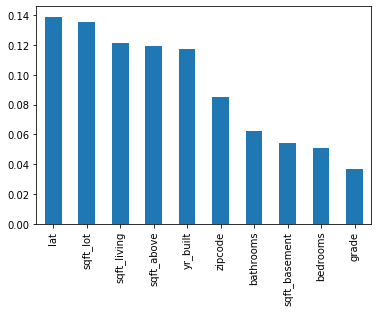

In [47]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='bar')
plt.show()

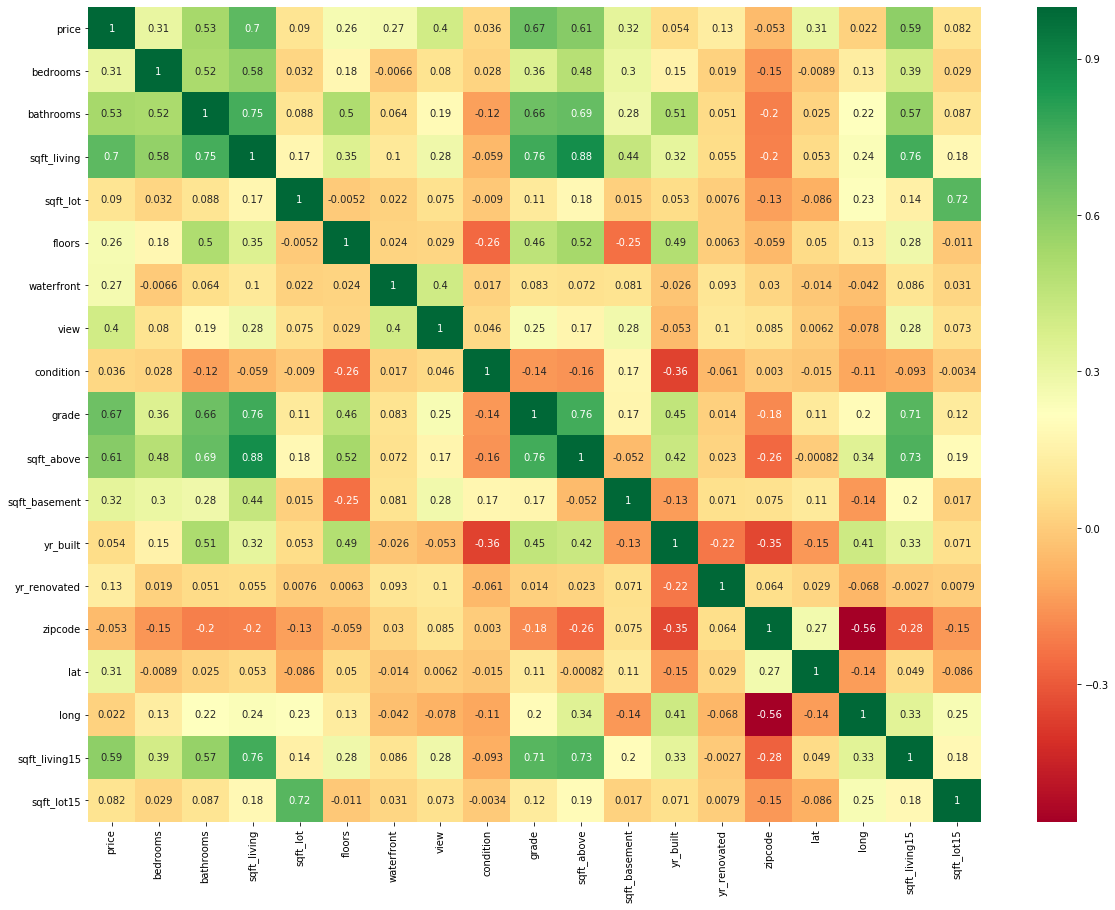

In [49]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = house.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,15))
#plot heat map
g=sns.heatmap(house[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [25]:
my_features = house[['sqft_lot', 'yr_renovated', 'sqft_living', 'sqft_above', 'sqft_basement', 'view', 'waterfront', 'bathrooms','grade', 'yr_built']]

In [53]:
one_feature = house[['sqft_living']]

In [51]:
Y = house['price']

## Linear regression - one independent feature

In [27]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [54]:
lm.fit(one_feature, Y)
lm.score(one_feature, Y)

0.49285321790379316

## Linear regression - multiple independent features

In [56]:
lm.fit(my_features, Y)
print('Multiple regression R-square value is: {}'.format(lm.score(my_features,Y)))

Multiple regression R-square value is: 0.6449592720073403


## Polynomial regression

In [58]:
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(my_features,Y)
ypipe=pipe.predict(my_features)
from sklearn.metrics import r2_score
r_squared = r2_score(ypipe,Y)
print('The R-square value for polynomial regression is: ', r_squared)

The R-square value for polynomial regression is:  0.6170702372196035


## Ridge regression

In [59]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='r2',cv=5)
ridge_regressor.fit(my_features, Y)

C:\Users\HitBuy Atrium\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.62759e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\HitBuy Atrium\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.05613e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\HitBuy Atrium\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.42338e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\HitBuy Atrium\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.62759e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\HitBuy Atrium\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.05613e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\HitBuy Atrium\An

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=0)

In [61]:
print(ridge_regressor.best_params_)
print('Ridge regression r-squared value is: ', ridge_regressor.best_score_)

{'alpha': 5}
Ridge regression r-squared value is:  0.6401817072205118


In [63]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='r2',cv=100)

lasso_regressor.fit(my_features, Y)
print(lasso_regressor.best_params_)
print("Lasso regression r score is: ",lasso_regressor.best_score_)

C:\Users\HitBuy Atrium\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 513436508156944.6, tolerance: 289333102880.72626
  positive)
C:\Users\HitBuy Atrium\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 510717703726075.75, tolerance: 287738085805.71246
  positive)
C:\Users\HitBuy Atrium\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 513489721695908.1, tolerance: 288832714917.137
  positive)
C:\Users\HitBuy Atrium\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the n

{'alpha': 100}
Lasso regression r score is:  0.635461758245349
